In [1]:
##importing basic Libraries
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Importing the dataset
df=pd.read_excel(r'C:\Users\DELL\Downloads\flight.xlsx')

In [3]:
### Checking the dataset
df.head()

,Unnamed: 0,airlines,Arrival_time,Departure_time,Stops,Source,Destination,Price
0,0,IndiGo,02:30,05:25,Non stop,New Delhi,Bengaluru,8160
1,1,IndiGo,04:15,07:10,Non stop,New Delhi,Bengaluru,8160
2,2,SpiceJet,05:25,08:05,Non stop,New Delhi,Bengaluru,8160
3,3,Go First,05:45,08:40,Non stop,New Delhi,Bengaluru,8160
4,4,Vistara,05:55,08:40,Non stop,New Delhi,Bengaluru,8160


In [4]:
### Checking the dataset
df.shape

(1721, 8)

In [5]:
### Checking the null values in the dataset.
df.isnull().sum()

Unnamed: 0        0
airlines          0
Arrival_time      0
Departure_time    0
Stops             0
Source            0
Destination       0
Price             0
dtype: int64

In [7]:
### Dropping the null values
df.dropna(inplace=True)

In [9]:
### Checking the datatype 
df.dtypes

Unnamed: 0         int64
airlines          object
Arrival_time      object
Departure_time    object
Stops             object
Source            object
Destination       object
Price              int64
dtype: object

In [10]:
## The Unnamed column has no relation with the dataset lets remove this
df.drop(columns='Unnamed: 0', inplace=True)

### Data Cleaning is done. Now proceed toward the EDA. 

## EDA

In [11]:
### Importing the basic libraries 
import matplotlib.pyplot as plt
import seaborn as sns

IndiGo                 758
Vistara                305
Go First               197
Air India              158
AirAsia                150
SpiceJet               143
IndiGo, AirAsia          2
Vistara, IndiGo          2
AirAsia, IndiGo          1
Air India, IndiGo        1
Go First, IndiGo         1
SpiceJet, AirAsia        1
Vistara, Go First        1
Air India, Go First      1
Name: airlines, dtype: int64


<AxesSubplot:xlabel='airlines', ylabel='count'>

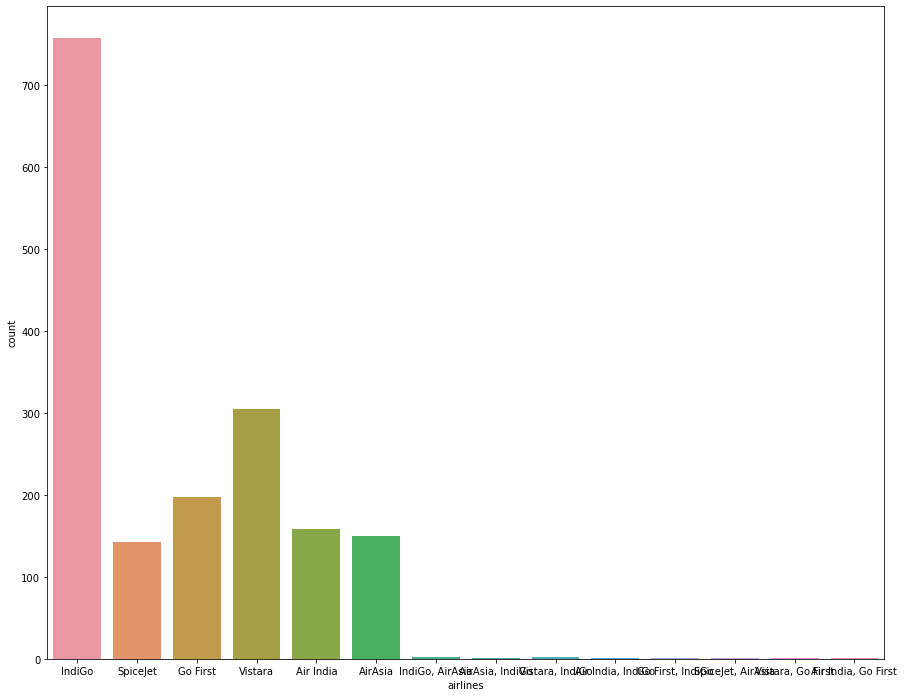

In [12]:
print(df['airlines'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='airlines', data=df)

Non stop                              1313
1 stop via Hyderabad                    69
1 stop via Bengaluru                    67
1 stop via Mumbai                       55
1 stop via Lucknow                      27
1 stop via Jaipur                       26
1 stop via Goa                          25
1 stop via Ahmedabad                    15
1 stop via Nagpur                       13
1 stop via Indore                       12
1 stop via Bagdogra                     11
1 stop via Raipur                       10
1 stop via Visakhapatnam                10
1 stop via Ranchi                        8
1 stop via Patna                         7
1 stop via Pune                          7
1 stop via Varanasi                      7
1 stop via Bhubaneswar                   5
1 stop via Jodhpur                       5
1 stop via Kolkata                       5
1 stop via Jabalpur                      4
1 stop via Udaipur                       3
1 stop via Jharsuguda                    3
1 stop via 

<AxesSubplot:xlabel='Stops', ylabel='count'>

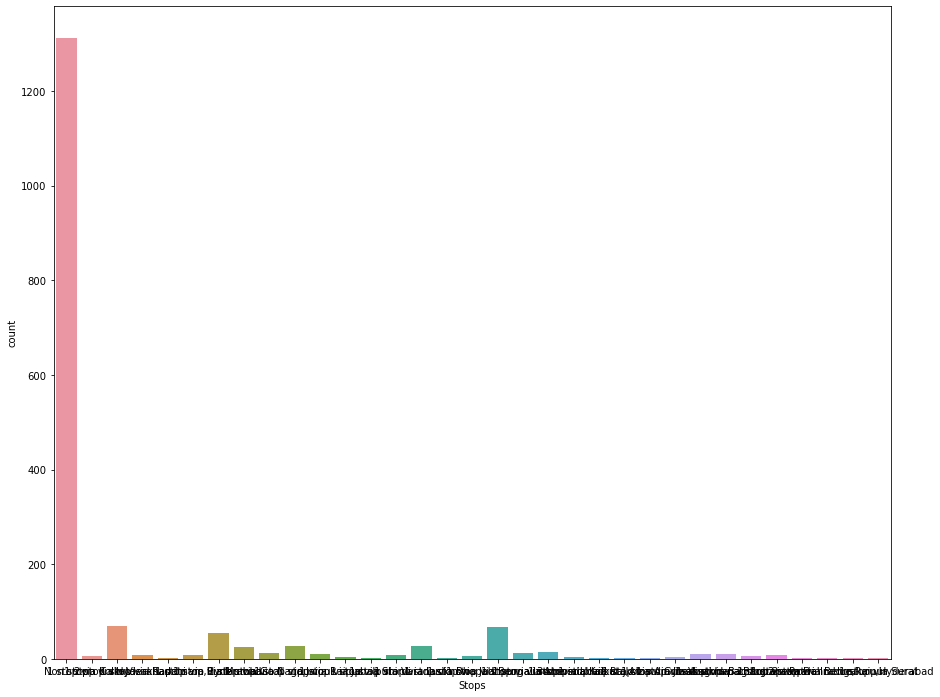

In [13]:
print(df['Stops'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Stops', data=df)

Mumbai       344
Bengaluru    282
Chennai      246
Goa          245
Kolkata      243
Hyderabad    193
Pune         168
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

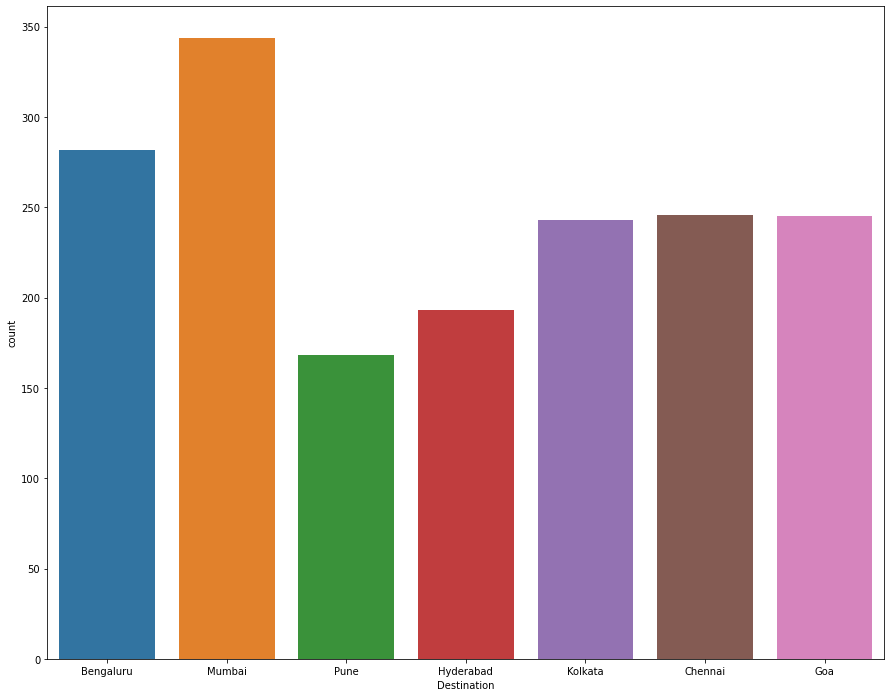

In [14]:
print(df['Destination'].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(x='Destination', data=df)

In [15]:
df.columns

Index(['airlines', 'Arrival_time', 'Departure_time', 'Stops', 'Source',
       'Destination', 'Price'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
col=['airlines', 'Arrival_time', 'Departure_time', 'Stops', 'Source',
       'Destination']
df[col]= df[col].apply(le.fit_transform)

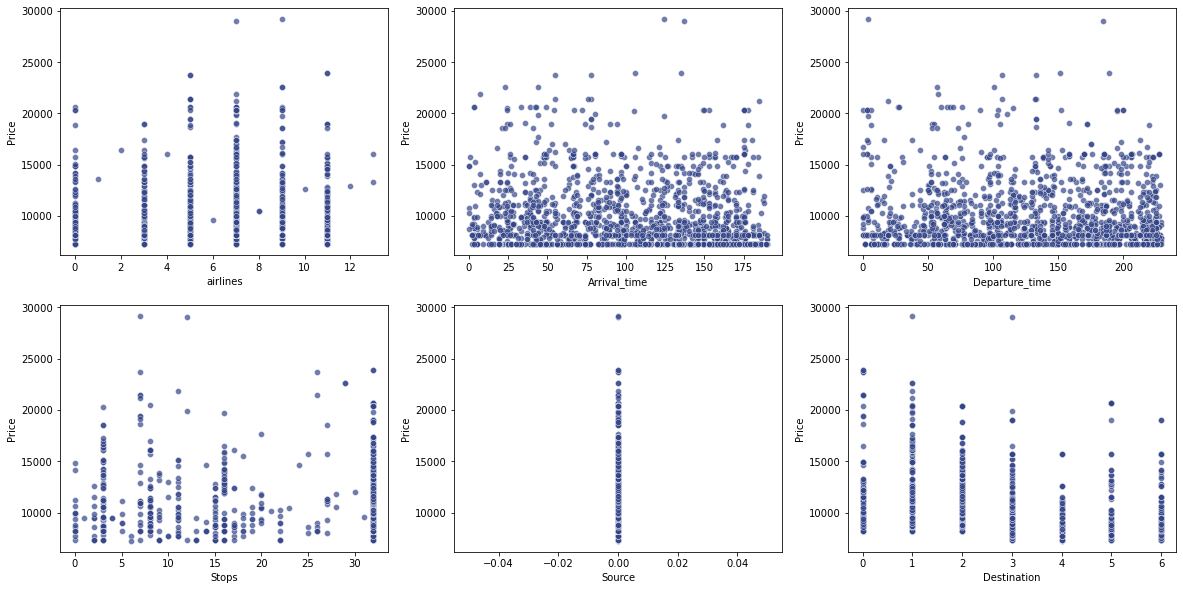

In [18]:
#### Plotting scatterplot to check the trend between features and target
x=df.drop(columns='Price')
y=df['Price']
plt.figure(figsize=(20,10))
pn=1
for column in x:
    if pn <= 6:
        plt.subplot(2,3, pn)
        sns.scatterplot(x[column],y, alpha=0.7, color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

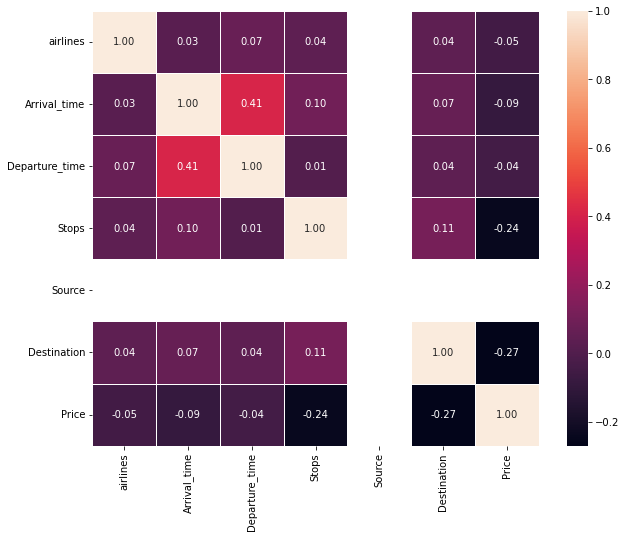

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

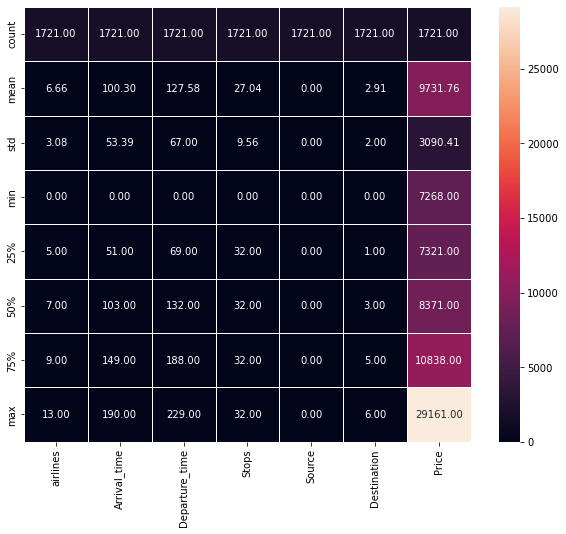

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(), annot=True, fmt='.2f', linewidths=0.5)
plt.show

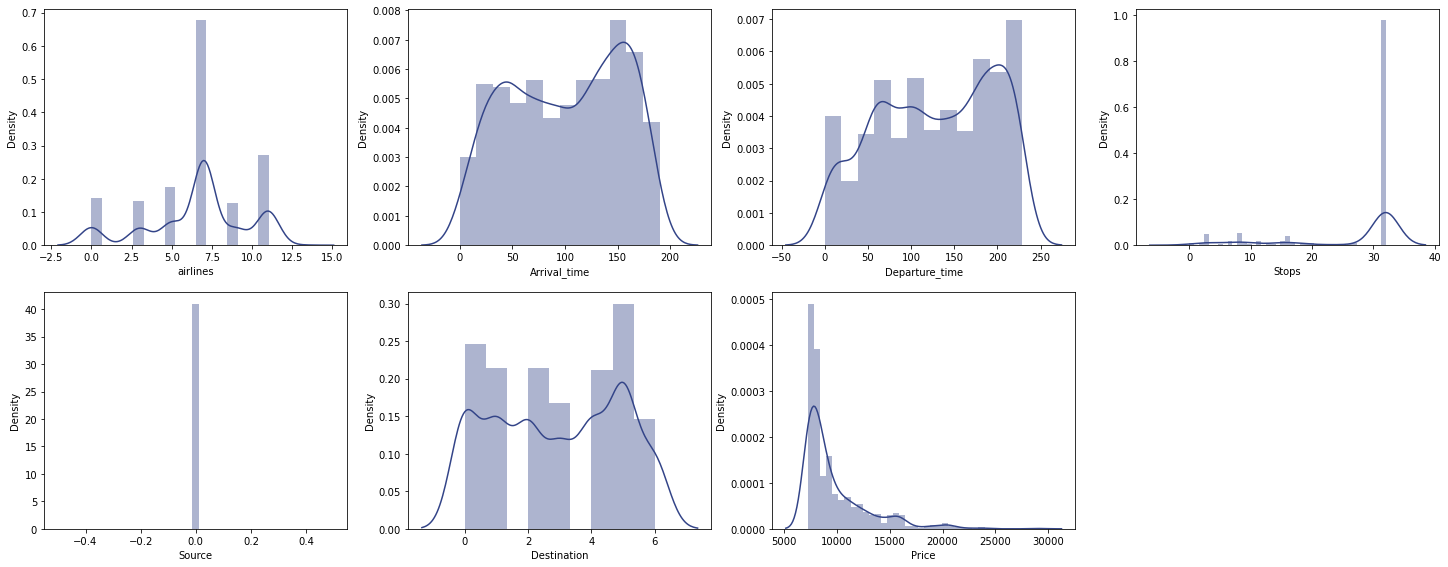

In [22]:
#### Plotting Distplot to check the distribution of the values
plt.figure(figsize=(25,20))
pn=1
for column in df:
    if pn <= 8:
        plt.subplot(4,4, pn)
        sns.distplot(df[column], color="#334488")
        plt.xlabel(column, fontsize= 10)
    pn+=1
plt.show()

In [23]:
x.skew()

airlines         -0.549191
Arrival_time     -0.133080
Departure_time   -0.201399
Stops            -1.608062
Source            0.000000
Destination      -0.037688
dtype: float64

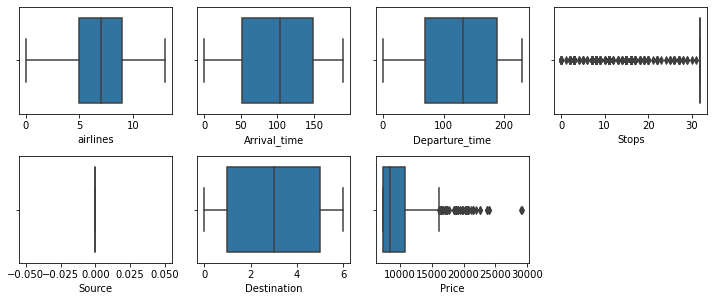

In [24]:
plt.figure(figsize=(10,8))
pn = 1
for column in df:
    if pn <= 8:
        ax = plt.subplot(4,4, pn)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=10)
    pn+=1
plt.tight_layout()

In [25]:
x= df.drop(columns="Price")
y=df["Price"]

In [26]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [27]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

1376 1376 345 345


In [28]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [39]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 7.920713684717285 
 Cross Validation score  -18.46899824407575 
Mean_absolute_error 1959.5549355294468 
Mean_squared_error 6903910.1084454525 
Root mean_squared_error 2627.5292783231653


In [30]:
### Importing the GradientBoostingRegressor and checking the r2 score, cross validation and errors
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
r2_gbr =r2_score(y_test,pred_gbr)
scr = cross_val_score(gbr, x,y, cv=5)
Corss_gbr = scr.mean()
mae_gbr = mean_absolute_error(y_test,pred_gbr)
mse_gbr= mean_squared_error(y_test,pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gbr*100, '\n Cross Validation score ', Corss_gbr*100, '\nMean_absolute_error', mae_gbr,"\nMean_squared_error", mse_gbr, '\nRoot mean_squared_error', rmse_gbr )

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 34.54662222227458 
 Cross Validation score  -20.54429386947739 
Mean_absolute_error 1577.3307151971892 
Mean_squared_error 4907555.809286683 
Root mean_squared_error 2215.30038804824


In [31]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 18.190745633807882 
 Cross Validation score  -29.07072110465049 
Mean_absolute_error 1668.3037681159421 
Mean_squared_error 6133884.837565217 
Root mean_squared_error 2476.6680919261703


In [32]:
### Importing the BayesianRidge and checking the score and r2 score
br= BayesianRidge()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
r2_br =r2_score(y_test,pred_br)
scr = cross_val_score(br, x,y, cv=5)
Corss_br = scr.mean()
mae_br = mean_absolute_error(y_test,pred_br)
mse_br= mean_squared_error(y_test,pred_br)
rmse_br= np.sqrt(mse_br)

print("\t\t\t BayesianRidge Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for BayesianRidge model', r2_br*100, '\n Cross Validation score ', Corss_br*100, '\nMean_absolute_error', mae_br,"\nMean_squared_error", mse_br, '\nRoot mean_squared_error', rmse_br)

			 BayesianRidge Model Accuracy and r2 score, cross validation and errors 

R2 score for BayesianRidge model 8.127850281737281 
 Cross Validation score  -18.411096660466278 
Mean_absolute_error 1960.1553800784297 
Mean_squared_error 6888379.4445662955 
Root mean_squared_error 2624.5722403024643


In [33]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x_scaled,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model -14.075822903329849 
 Cross Validation score - -34.18954576341541 
Mean_absolute_error 1798.4577059414673 
Mean_squared_error 8553163.89154959 
Root mean_squared_error 2924.579267441659


In [34]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 13.439364547286402 
 Cross Validation score  -42.75407520841867 
Mean_absolute_error 1668.8177317074635 
Mean_squared_error 6490133.34062152 
Root mean_squared_error 2547.574010823144


In [40]:
from sklearn.model_selection import GridSearchCV
rr = RandomForestRegressor()
para = {'n_estimators':range(1,5),
       'criterion':["mse", "mae"],
        'max_depth':range(1,6),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,10)}
grid =  GridSearchCV(rr, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 6),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [41]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'n_estimators': 4}

In [42]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestRegressor(criterion='mse',max_depth= 12, min_samples_leaf= 5, min_samples_split=5,n_estimators=10)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
r2_rr=r2_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss_rr = scr.mean()
mae_rr= mean_absolute_error(y_test,pred_rr)
mse_rr= mean_squared_error(y_test,pred_rr)
rmse_rr= np.sqrt(mse_rr)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_rr*100, '\n Cross Validation score ', Corss_rr*100, '\nMean_absolute_error', mae_rr,"\nMean_squared_error", mse_rr, '\nRoot mean_squared_error', rmse_rr )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 27.993852718503454 
 Cross Validation score  -30.34671093834676 
Mean_absolute_error 1593.7632792158058 
Mean_squared_error 5398868.60531006 
Root mean_squared_error 2323.546557594674


In [43]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
para = {'n_estimators':range(1,5),
       'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,6)}
grid_s =  GridSearchCV(gb, param_grid=para)
grid_s.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [44]:
grid_s.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 4}

In [56]:
### Importing the RandomForestRegressor and checking the score and r2 score
gb = GradientBoostingRegressor(criterion='mae',max_depth= 5, min_samples_leaf= 5, min_samples_split=15,n_estimators=18)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
r2_gb=r2_score(y_test,pred_gb)
scr = cross_val_score(gb, x,y, cv=5)
Corss_gb = scr.mean()
mae_gb= mean_absolute_error(y_test,pred_gb)
mse_gb= mean_squared_error(y_test,pred_gb)
rmse_gb= np.sqrt(mse_gb)

print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gb*100, '\n Cross Validation score ', Corss_gb*100, '\nMean_absolute_error', mae_gb,"\nMean_squared_error", mse_gb, '\nRoot mean_squared_error', rmse_gb)

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 32.13977860793433 
 Cross Validation score  -12.102433197870008 
Mean_absolute_error 1396.7286195123447 
Mean_squared_error 5088015.852184878 
Root mean_squared_error 2255.663062645855
